## 2. Traveling Salesman Problem

In [1]:
import random
import csv
import numpy as np
from itertools import product
import matplotlib.pyplot as plt

In [2]:
# Define distances

def compute_distance(loc1, loc2):
    dx = loc1[0] - loc2[0]
    dy = loc1[1] - loc2[1]
    return np.sqrt(dx**2+dy**2)

# Define function that takes in a tour and outputs the total distance

def tour_dist(tour):
    total_dist = 0
    for i in range(len(tour)-1):
        dist = distance[(tour[i], tour[i+1])]
        total_dist += dist
    total_dist += distance[(tour[-1], tour[0])] # distance returning to starting location
    return total_dist

# Define function that takes in a tour and outputs a perturbed tour, with first perturb function

def perturb(tour): 
    indices = random.sample(range(0,len(tour)), 2) # random.sample ensures unique indices
    i = min(indices)
    j = max(indices)
    perturbed_tour = tour[:i] + tour[i:j+1][::-1] + tour[j+1:]
    return perturbed_tour

In [3]:
# Setting parameters

num_cities = 100 # n = 100
cart_prod = list(product(range(num_cities), range(num_cities))) # Label the cities by their indices

In [4]:
# Generate the coordinates of the cities

cities = [(np.random.rand(),np.random.rand()) for i in range(num_cities)]

# Compute distance matrix

distance = ({(c1,c2) : compute_distance(cities[c1], cities[c2]) for c1, c2 in cart_prod})

### Simulated annealing algorithm with first perturb rule

In [5]:
# Initialize same random tour for both perturb rules for comparison

cities_index = [i for i in range(num_cities)]
random.shuffle(cities_index)
initial_tour = cities_index

In [6]:
# Initial tour for first perturb rule

current_tour = initial_tour.copy()

# Distance of initial tour

tour_dist(current_tour)

50.5172279351468

In [7]:
# Initialize temperature parameter

T = 100
T_update = 0.99 # eta = 0.99

# Implement algorithm with first perturb rule

accepted_count = 0

for i in range(10000):
    f_curr = tour_dist(current_tour)
    cand_tour = perturb(current_tour)
    f_cand = tour_dist(cand_tour)
    u = np.random.rand()
    if np.exp(-((f_cand - f_curr) / T)) >= u:
        current_tour = cand_tour
        accepted_count += 1
    T = T_update * T

<ipython-input-7-d61a0cc8762c>:15: RuntimeWarning: overflow encountered in exp
  if np.exp(-((f_cand - f_curr) / T)) >= u:


In [8]:
# Results for first perturb rule

# Number of candidate tours accepted
print(accepted_count)

# Distance of shortest tour
print(tour_dist(current_tour))

889
9.199323401302737


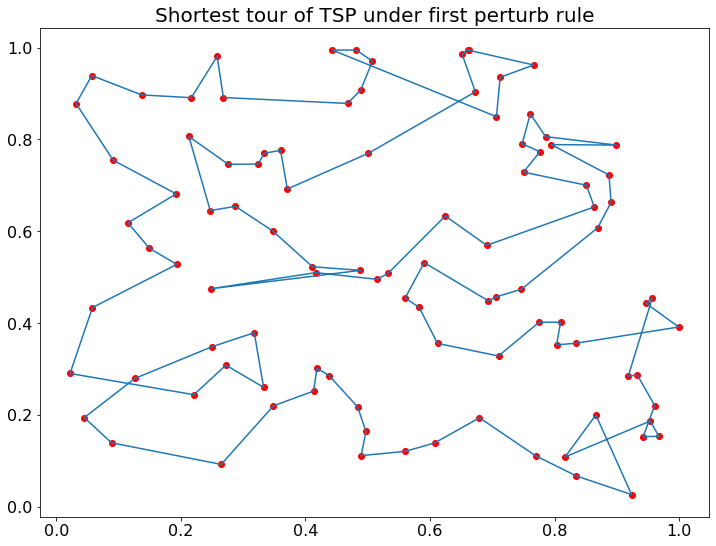

In [9]:
# Plot the cities with the tour under first perturb rule

fig, ax = plt.subplots(figsize=(12,9))


# Plot the coordinates of the cities
x_coord_of_all_cities = [coord[0] for coord in cities]
y_coord_of_all_cities = [coord[1] for coord in cities]
ax.scatter(x_coord_of_all_cities, y_coord_of_all_cities, color = 'red')

# Plot the shortest tour connecting every city
x_coord_of_tour = [cities[loc][0] for loc in current_tour]
y_coord_of_tour = [cities[loc][1] for loc in current_tour]

ax.plot(x_coord_of_tour, y_coord_of_tour, color = '#1f77b4')
ax.plot([x_coord_of_tour[-1], x_coord_of_tour[0]], [y_coord_of_tour[-1], y_coord_of_tour[0]],
        color = '#1f77b4')

ax.set_title('Shortest tour of TSP under first perturb rule', fontsize = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

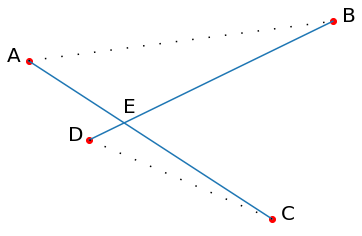

In [10]:
# Plot the intersection of any two edges in general

fig, ax = plt.subplots()

ax.scatter([0.12,0.2,0.1,0.18],[0.14,0.2,0.18,0.1], color = 'red')

ax.plot([0.12,0.2],[0.14,0.2], color = '#1f77b4')
ax.plot([0.1,0.18],[0.18,0.1], color = '#1f77b4')
ax.plot([0.1,0.2],[0.18,0.2], linestyle = (0, (1, 10)), color = 'black')
ax.plot([0.12,0.18],[0.14,0.1], linestyle = (0, (1, 10)), color = 'black')

plt.text(0.093, 0.18, 'A', fontsize = 20)
plt.text(0.203, 0.2, 'B', fontsize = 20)
plt.text(0.183, 0.1, 'C', fontsize = 20)
plt.text(0.113, 0.14, 'D', fontsize = 20)
plt.text(0.131, 0.154, 'E', fontsize = 20)

plt.axis('off')
plt.show()

### Simulated annealing algorithm with second perturb rule

In [11]:
# Define new perturbed tour function, with second perturb rule

def n_perturb(tour): 
    indices = random.sample(range(0,len(tour)), 2) # random.sample ensures unique indices
    i = min(indices)
    j = max(indices)
    tour[i], tour[j] = tour[j], tour[i]
    return tour

In [12]:
# Initial tour for second perturb rule

n_current_tour = initial_tour.copy()

# Distance of initial tour

tour_dist(n_current_tour)

50.5172279351468

In [13]:
# Initialize temperature parameter

T = 100
T_update = 0.99 # eta = 0.99

# Implement algorithm with second perturb rule, replace perturb with n_perturb

n_accepted_count = 0

for i in range(10000):
    f_curr = tour_dist(n_current_tour)
    cand_tour = n_perturb(n_current_tour)
    f_cand = tour_dist(cand_tour)
    u = np.random.rand()
    if np.exp(-((f_cand - f_curr) / T)) >= u:
        n_current_tour = cand_tour
        n_accepted_count += 1
    T = T_update * T

<ipython-input-13-3cdb247b8186>:15: RuntimeWarning: overflow encountered in exp
  if np.exp(-((f_cand - f_curr) / T)) >= u:


In [14]:
# Results for second perturb rule

# Number of candidate tours accepted
print(n_accepted_count)

# Distance of shortest tour
print(tour_dist(n_current_tour))

5266
48.867230128219546


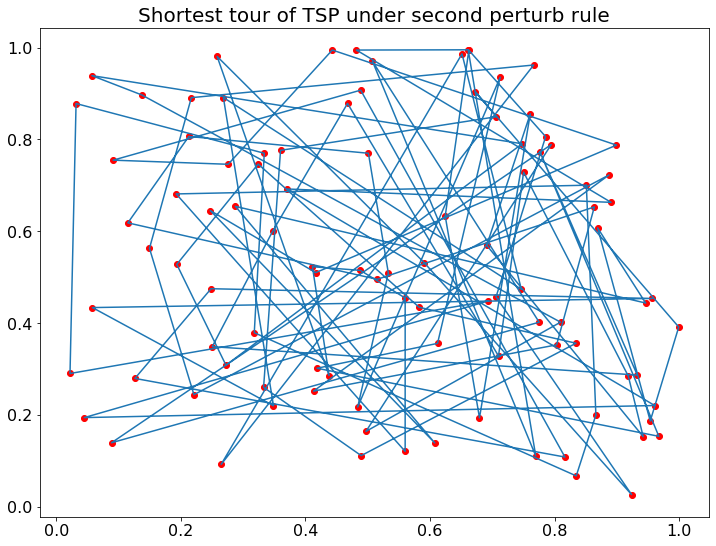

In [15]:
# Plot the cities with the tour under second perturb rule

fig, ax = plt.subplots(figsize=(12,9))

# Plot the coordinates of the cities
x_coord_of_all_cities = [coord[0] for coord in cities]
y_coord_of_all_cities = [coord[1] for coord in cities]
ax.scatter(x_coord_of_all_cities, y_coord_of_all_cities, color = 'red')

# Plot the shortest tour connecting every city
x_coord_of_tour = [cities[loc][0] for loc in n_current_tour]
y_coord_of_tour = [cities[loc][1] for loc in n_current_tour]

ax.plot(x_coord_of_tour, y_coord_of_tour, color = '#1f77b4' )
ax.plot([x_coord_of_tour[-1], x_coord_of_tour[0]], [y_coord_of_tour[-1], y_coord_of_tour[0]],
        color = '#1f77b4')

ax.set_title('Shortest tour of TSP under second perturb rule', fontsize = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

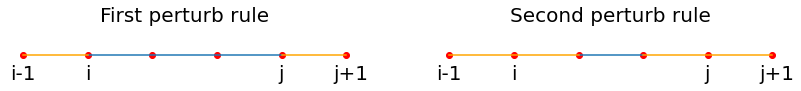

In [16]:
# Difference between first perturb rule and second perturb rule in general

fig, ax = plt.subplots(1,2,figsize=(14,1))

ax[0].scatter([0.05,0.1,0.15,0.2,0.25,0.3], [0.5,0.5,0.5,0.5,0.5,0.5], color = 'red')
ax[0].plot([0.1,0.15,0.2,0.25], [0.5,0.5,0.5,0.5], color = '#1f77b4')
ax[0].plot([0.05,0.1],[0.5,0.5], color = 'orange')
ax[0].plot([0.25,0.3],[0.5,0.5], color = 'orange')


ax[1].scatter([0.05,0.1,0.15,0.2,0.25,0.3], [0.5,0.5,0.5,0.5,0.5,0.5], color = 'red')
ax[1].plot([0.15,0.2], [0.5,0.5], color = '#1f77b4')
ax[1].plot([0.05,0.1,0.15],[0.5,0.5,0.5], color = 'orange')
ax[1].plot([0.2,0.25,0.3],[0.5,0.5,0.5], color = 'orange')

ax[0].text(0.0975,0.475,'i',fontsize = 20)
ax[0].text(0.2475,0.475,'j',fontsize = 20)
ax[0].text(0.04,0.475,'i-1',fontsize = 20)
ax[0].text(0.29,0.475,'j+1',fontsize = 20)

ax[1].text(0.0975,0.475,'i',fontsize = 20)
ax[1].text(0.2475,0.475,'j',fontsize = 20)
ax[1].text(0.04,0.475,'i-1',fontsize = 20)
ax[1].text(0.29,0.475,'j+1',fontsize = 20)

ax[0].set_title('First perturb rule', fontsize = 20)
ax[1].set_title('Second perturb rule', fontsize = 20)


ax[0].axis('off')
ax[1].axis('off')
plt.show()

---